In [1]:
import cv2,os
import matplotlib.pyplot as plt
import numpy as np
import shutil
import json

In [4]:
print(cv2.__version__)
print(np.__version__)

3.4.2
1.16.2


# images

In [8]:
path = r"E:\dataset\CASIA\CASIA-WebFace\0000045\001.jpg"

img_bgr = cv2.imread(path)

if img_bgr is None:#must check if it's None
    print("Read {} failed".format(path))
else:
    print("image shape: ",img_bgr.shape)#height x width x channel
    print("numeric type: ",img_bgr.dtype)#image numeric type is uint8, ranging from 0 to 255
    
    #----change to (R,G,B) format
    img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
#     img_rgb = img_bgr[:,:,::-1]#you can also reverse channels

    #----change to gray image
    img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    print("img_gray shape:",img_gray.shape)
    img_gray = np.expand_dims(img_gray,axis=-1)
    print("img_gray shape:",img_gray.shape)
    
    #----resize(with fixed values)
    width = 50
    height = 70
    img_resized = cv2.resize(img_rgb,(width,height))#size format must be tuple (width,height)
    print("img_resized shape: ",img_resized.shape)
    
    #----resize(with ratio)
    img_resized_2 = cv2.resize(img_rgb,None,fx=0.8,fy=0.8)
    print("img_resized_2 shape: ",img_resized_2.shape)
    
    #----crop
    img_crop = img_rgb[100:200,100:200:,:]
    print("img_crop shape:",img_crop.shape)
    
    #----save the image
    new_path = r"test_save.png"#remember to give the extension name
    cv2.imwrite(new_path,img_resized)

image shape:  (250, 250, 3)
numeric type:  uint8
img_gray shape: (250, 250)
img_gray shape: (250, 250, 1)
img_resized shape:  (70, 50, 3)
img_resized_2 shape:  (200, 200, 3)
img_crop shape: (100, 100, 3)


# display one image

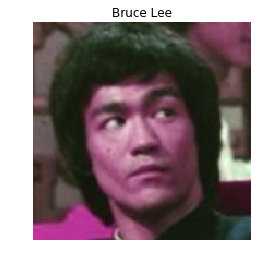

In [11]:
#I prefer matplotlib.pyplot to display images
plt.imshow(img_resized_2)
plt.axis('off')
plt.title('Bruce Lee')
plt.show()

# How to show many images horizontally

plt.subplot(y_quantity, x_quantity, index)

For example, y_quantity = 3, x_quantity = 5，15 plots and index numbers are shown below

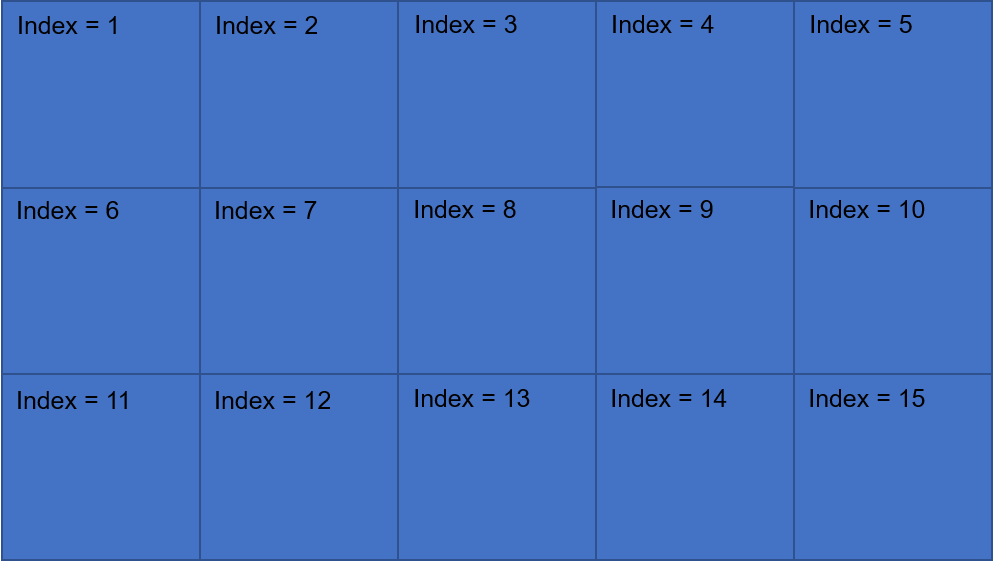

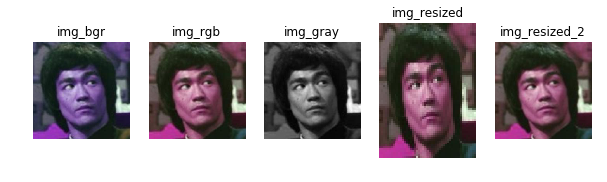

In [13]:
plt.figure(figsize=(10,10))
# plt.figure()

y_quantity = 1
x_quantity = 5


plt.subplot(y_quantity,x_quantity,1)
plt.axis("off")
plt.title("img_bgr")
plt.imshow(img_bgr)

plt.subplot(y_quantity,x_quantity,2)
plt.axis("off")
plt.title("img_rgb")
plt.imshow(img_rgb)


plt.subplot(y_quantity,x_quantity,3)
plt.axis("off")
plt.title("img_gray")
plt.imshow(img_gray[:,:,0],cmap='gray')

plt.subplot(y_quantity,x_quantity,4)
plt.axis("off")
plt.title("img_resized")
plt.imshow(img_resized)

plt.subplot(y_quantity,x_quantity,5)
plt.axis("off")
plt.title("img_resized_2")
plt.imshow(img_resized_2)

plt.show()

# image normalization

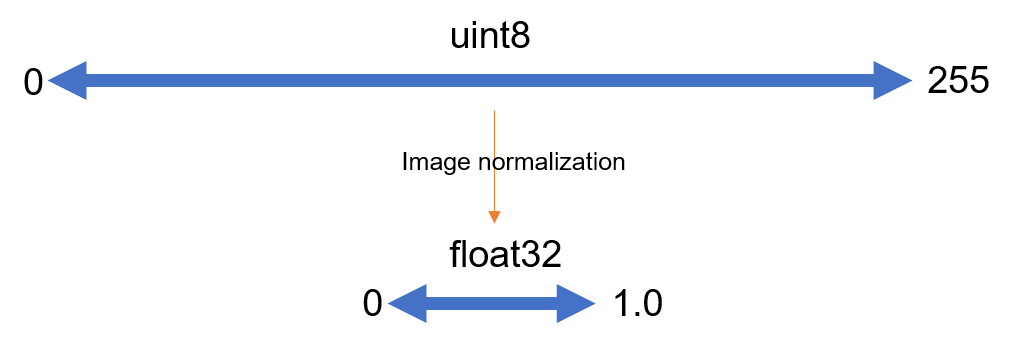

In [14]:
#Since the image dtype is uint8 which means the max value is 255, the image is normalized to 0~1
#When all digits are 0 ~ 1, the calculation is easier and it's good for model training

print("The max value before the normalization: ",np.max(img_rgb))
img_rgb = img_rgb.astype(np.float32)
img_rgb /= 255
print("The max value after the normalization: ",np.max(img_rgb))

The max value before the normalization:  255
The max value after the normalization:  1.0
